# **Loan Approval Predictor**

**The aim of this project is to understand how the approval/disaproval of loan is influenced by the factors like income, credit score etc.**

this dataset consist of 8 features and 2000 records

those 8 features are -
1. name          - name of the person
2. city          - city where that person lives
3. income        - his annual income in USD
4. credit_score  - credit score of that person
5. loan_amount   - the amount he/she is asking for loan
6. year_employed - no. of years he/she has been employed
7. points        - his/her points
8. loan_approved - whether his/her loan is approved or not

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
df = pd.read_csv('loan_approval.csv')
df.head(5)

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [41]:
df.shape

(2000, 8)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [43]:
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


statistical insights - 
1. mean of income is about 90,000 USD and that of loan_amount is about 25,000 USD
2. mean of credit score is ~ 570 

In [44]:
df.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

there are no missing values

In [45]:
df['city'].value_counts()

city
North Joseph            4
Port Christopher        3
North David             3
West Melissa            3
Williamsstad            3
                       ..
Lynchbury               1
New Cesarfurt           1
Vanessaview             1
Port Amanda             1
East Courtneychester    1
Name: count, Length: 1882, dtype: int64

As there are lot of unique cities - 1882, it wont contribute much to the analysis and prediction and so as the name feature so its better to drop both of them

In [46]:
df.drop(columns=['name','city'],inplace=True)

In [47]:
df

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,False
1,44592,729,15446,28,55.0,False
2,33278,584,11189,13,45.0,False
3,127196,344,48823,29,50.0,False
4,66048,496,47174,4,25.0,False
...,...,...,...,...,...,...
1995,92163,770,12251,13,85.0,True
1996,38799,635,48259,17,40.0,False
1997,41957,763,16752,5,60.0,True
1998,139022,360,24031,35,55.0,False


In [48]:
numeric_df = df.drop(columns='loan_approved')

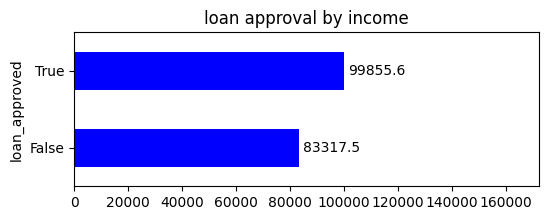

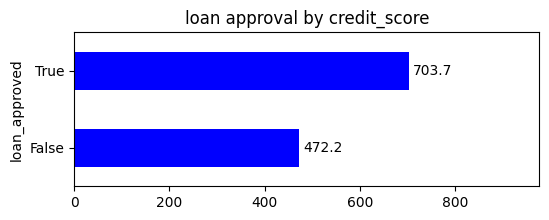

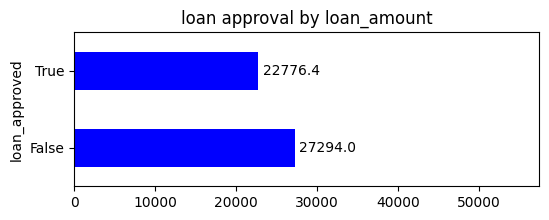

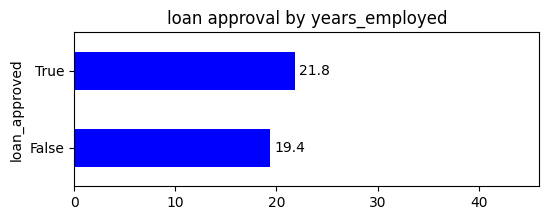

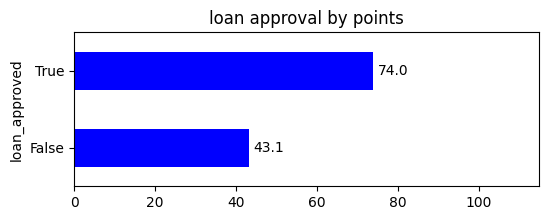

In [49]:
for feature in numeric_df:
    plt.figure(figsize=(6,2))
    ax = df.groupby('loan_approved')[feature].mean().plot(kind='barh',color='b')
    ax.bar_label(ax.containers[0],fmt='%.1f',padding=3)
    
    plt.title(f'loan approval by {feature}')
    ax.set_xlim(right=df[feature].max() * 1.15)
    plt.show()

insights - 

In [50]:
df

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,False
1,44592,729,15446,28,55.0,False
2,33278,584,11189,13,45.0,False
3,127196,344,48823,29,50.0,False
4,66048,496,47174,4,25.0,False
...,...,...,...,...,...,...
1995,92163,770,12251,13,85.0,True
1996,38799,635,48259,17,40.0,False
1997,41957,763,16752,5,60.0,True
1998,139022,360,24031,35,55.0,False


<Figure size 600x400 with 0 Axes>

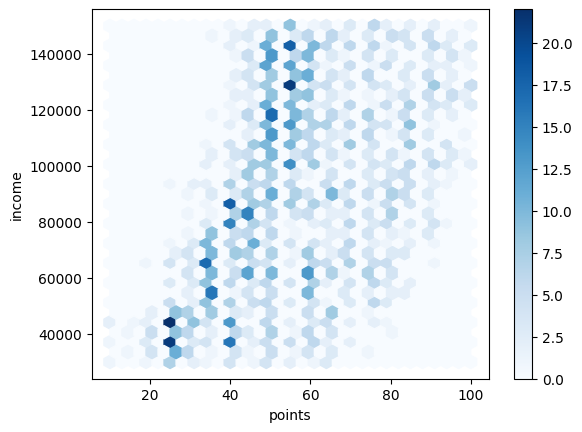

<Figure size 600x400 with 0 Axes>

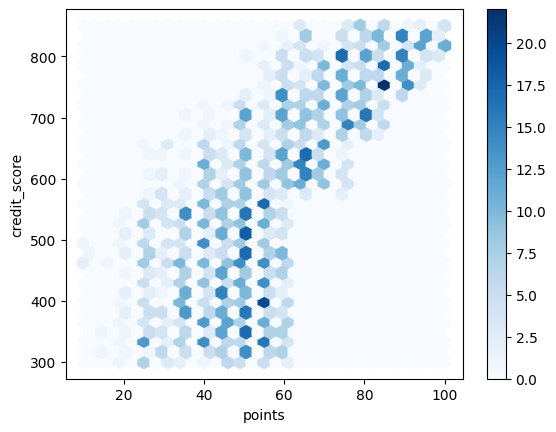

<Figure size 600x400 with 0 Axes>

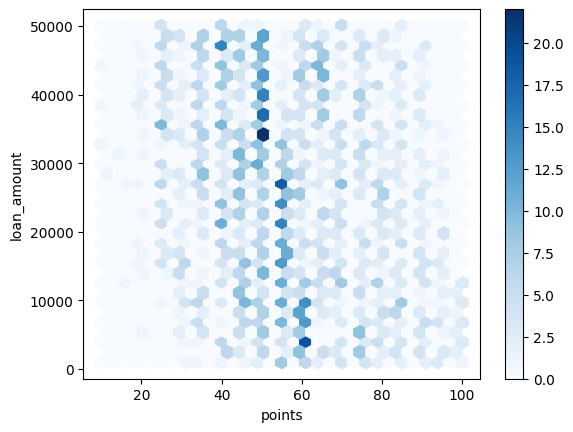

<Figure size 600x400 with 0 Axes>

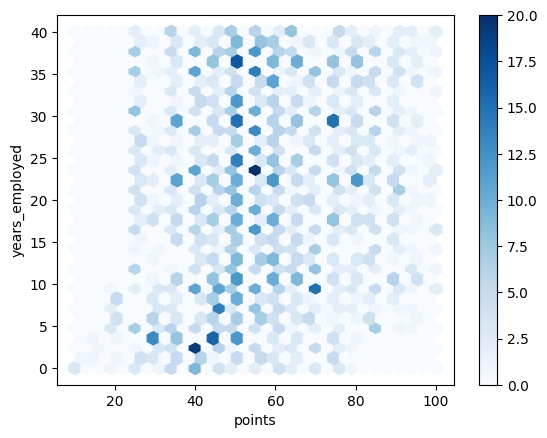

<Figure size 600x400 with 0 Axes>

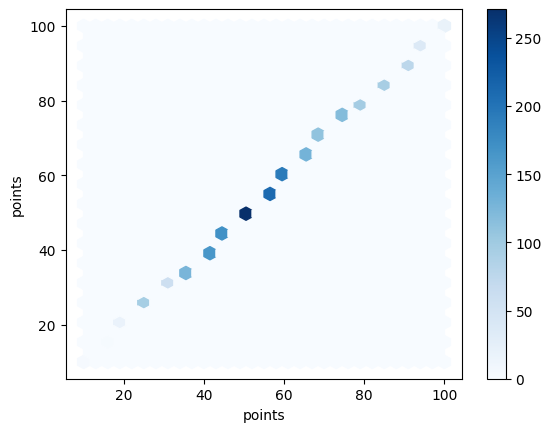

In [51]:
for features in numeric_df:
    plt.figure(figsize=(6,4))
    df.plot.hexbin(x='points', y=features, gridsize=30, cmap='Blues')
    plt.show()

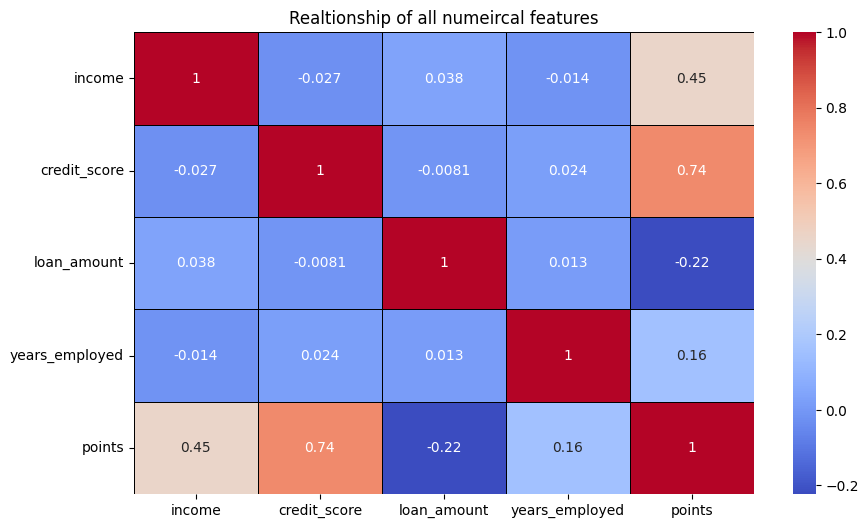

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),cmap='coolwarm',annot=True,linecolor='black',linewidths=0.5)
plt.title('Realtionship of all numeircal features')
plt.show()

In [53]:
df['loan_approved'].value_counts()

loan_approved
False    1121
True      879
Name: count, dtype: int64

In [55]:
df['loan_approved'] = df['loan_approved'].astype(int)


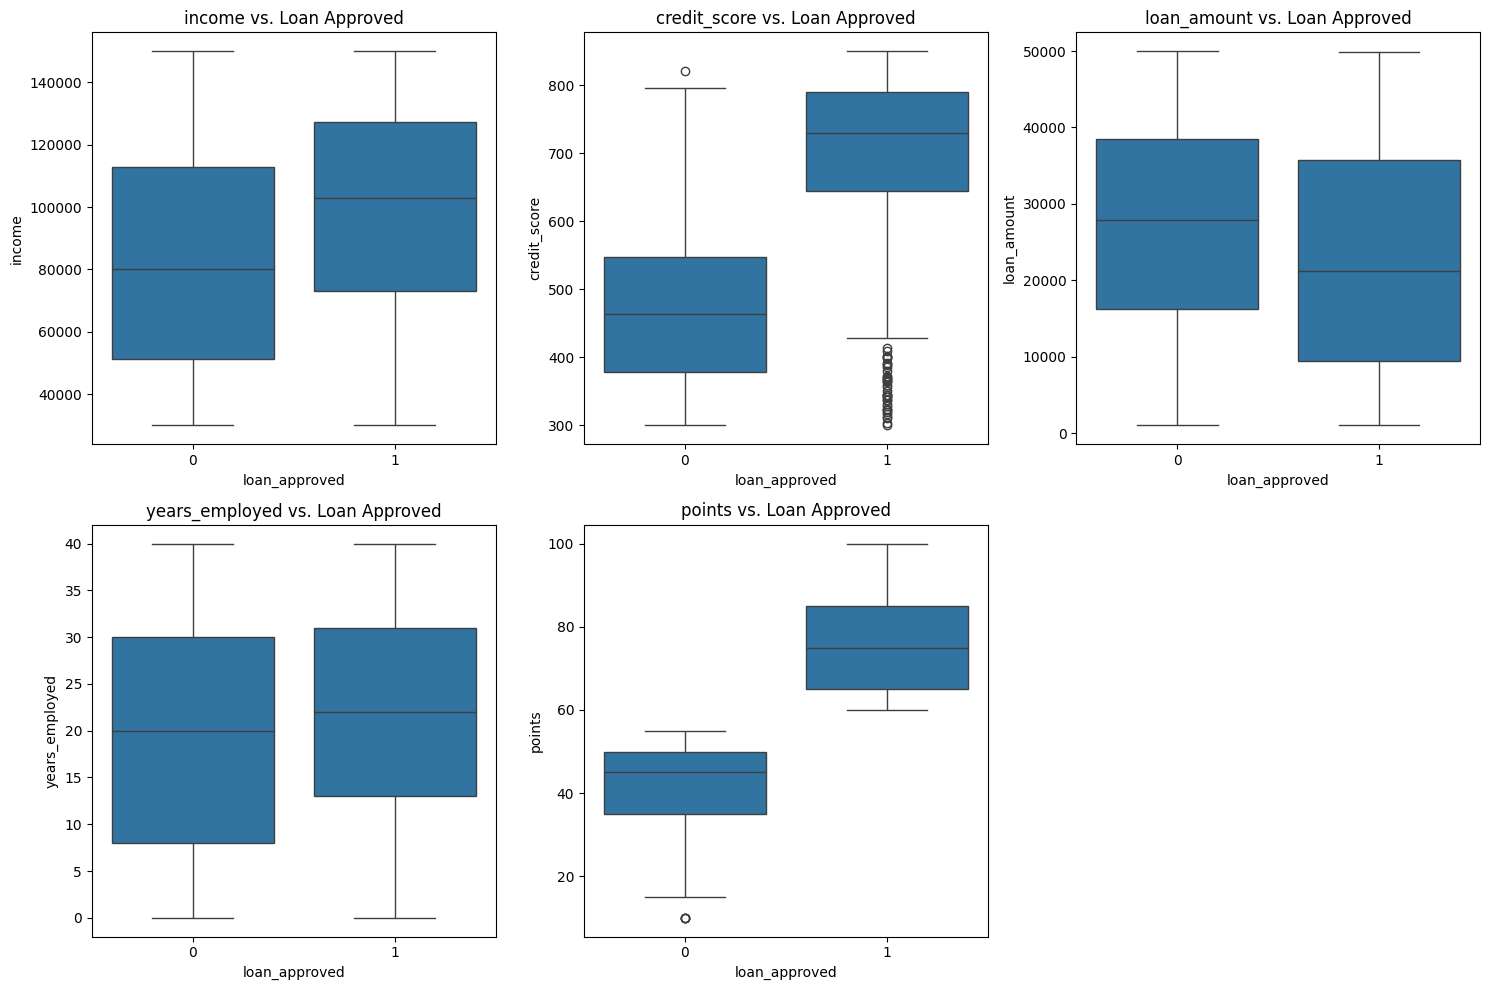

In [58]:
features = ['income', 'credit_score', 'loan_amount', 'years_employed', 'points']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='loan_approved', y=feature, data=df)
    plt.title(f'{feature} vs. Loan Approved')

plt.tight_layout()
plt.show()